In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [3]:
# research article data

domestic_research = pd.read_csv('data/domestic_brazil_research.csv')
international_research = pd.read_csv('data/international_brazil_research.csv')
collaborative_research = pd.read_csv('data/collaboration_brazil_research.csv')

domestic_research = domestic_research[domestic_research['Publication Year'] < 2022]
international_research = international_research[international_research['Publication Year'] < 2022]
collaborative_research = collaborative_research[collaborative_research['Publication Year'] < 2022]

domestic_research = domestic_research.reset_index(drop=True)
international_research = international_research.reset_index(drop=True)
collaborative_research = collaborative_research.reset_index(drop=True)

# gdp data 

GDP_df = pd.read_csv('data/gdp_brazil.csv')

# deforestation data

deforestation_df = pd.read_csv('data/deforestation_data.csv')

## Pre-processing data

Aligning year ranges between the data

In [4]:
min_year = max([min(domestic_research['Publication Year']), min(international_research['Publication Year']), min(deforestation_df['year'])])

deforestation_df = deforestation_df[deforestation_df['year']  >= min_year]
domestic_research = domestic_research[domestic_research['Publication Year'] >= min_year]
international_research = international_research[international_research['Publication Year'] >= min_year]
GDP_df = GDP_df[GDP_df['Year']  >= min_year]

deforestation_df = deforestation_df.reset_index(drop=True)
domestic_research = domestic_research.reset_index(drop=True)
international_research = international_research.reset_index(drop=True)
GDP_df = GDP_df.reset_index(drop=True)

In [5]:
# dataframes to hold final predictor/response data

domestic_df = pd.DataFrame({'Year': np.arange(min_year, 2022), 'Deforestation': deforestation_df['deforestation_rate']})
international_df = pd.DataFrame({'Year': np.arange(min_year, 2022), 'Deforestation': deforestation_df['deforestation_rate']})

Processing article data to get research volume per year and citation metrics

In [ ]:
article_df_year.columns

In [37]:
# domestic research
volume_list = []
citation_count_list = []
for year in domestic_df['Year']:
    article_df_year = domestic_research[domestic_research['Publication Year'] == year]
    volume_list.append(len(article_df_year))
    citation_count_list.append(sum(article_df_year['Times Cited, All Databases'] / (2022 - article_df_year['Publication Year'])))

    
domestic_df['Paper Volume'] = volume_list
domestic_df['Total Citation Count'] = citation_count_list
domestic_df['Deforestation'] = deforestation_df['deforestation_rate']
domestic_df['GDP'] = GDP_df['GDP']
domestic_df['Avg Citation Count'] = domestic_df['Total Citation Count'] / domestic_df['Paper Volume']


# international research
volume_list = []
citation_count_list = []
for year in domestic_df['Year']:
    article_df_year = international_research[international_research['Publication Year'] == year]
    volume_list.append(len(article_df_year))
    citation_count_list.append(sum(article_df_year['Times Cited, All Databases'] / (2022 - article_df_year['Publication Year'])))

    
international_df['Paper Volume'] = volume_list
international_df['Total Citation Count'] = citation_count_list
international_df['Deforestation'] = deforestation_df['deforestation_rate']
international_df['Avg Citation Count'] = international_df['Total Citation Count'] / international_df['Paper Volume']

## Plots of raw data

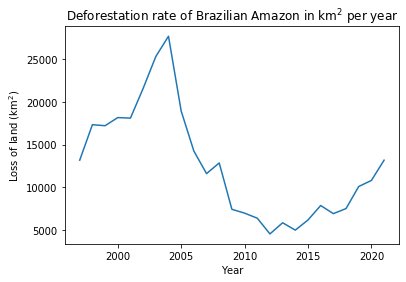

In [91]:
plt.plot(domestic_df['Year'], domestic_df['Deforestation'])
plt.title(r'Deforestation rate of Brazilian Amazon in km$^2$ per year')
plt.xlabel('Year')
plt.ylabel(r'Loss of land (km$^2$)')
plt.show()

### Paper volume timeseries

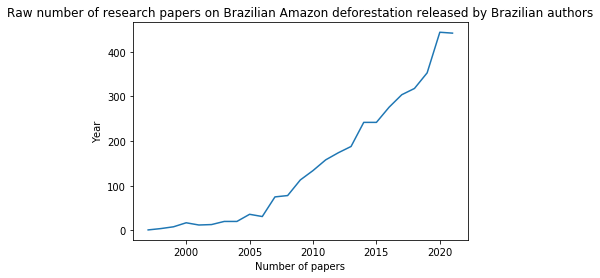

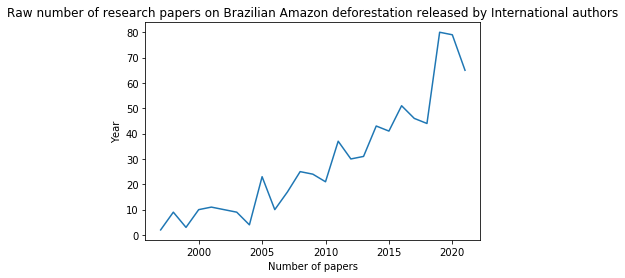

In [89]:
plt.plot(domestic_df['Year'], domestic_df['Paper Volume'])
plt.title('Raw number of research papers on Brazilian Amazon deforestation released by Brazilian authors')
plt.xlabel('Number of papers')
plt.ylabel('Year')
plt.show()

plt.plot(international_df['Year'], international_df['Paper Volume'])
plt.title('Raw number of research papers on Brazilian Amazon deforestation released by International authors')
plt.xlabel('Number of papers')
plt.ylabel('Year')
plt.show()

Initial plots

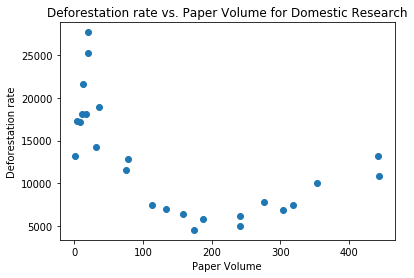

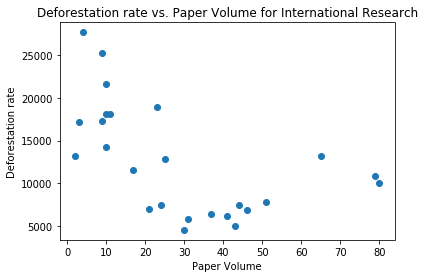

In [9]:
plt.scatter(domestic_df['Paper Volume'], domestic_df['Deforestation'])
plt.xlabel('Paper Volume')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Paper Volume for Domestic Research')
plt.show()

plt.scatter(international_df['Paper Volume'], international_df['Deforestation'])
plt.xlabel('Paper Volume')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Paper Volume for International Research')
plt.show()

In [10]:
domestic_df.columns

Index(['Year', 'Deforestation', 'Paper Volume', 'Total Citation Count', 'GDP',
       'Avg Citation Count'],
      dtype='object')

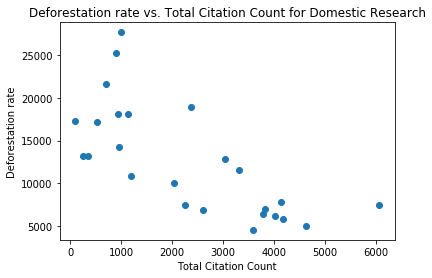

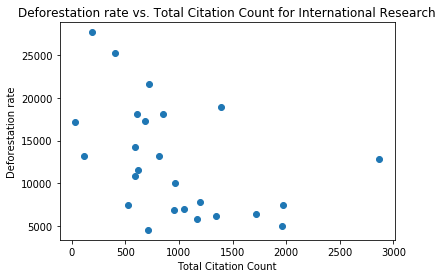

In [12]:
plt.scatter(domestic_df['Total Citation Count'], domestic_df['Deforestation'])
plt.xlabel('Total Citation Count')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Total Citation Count for Domestic Research')
plt.show()

plt.scatter(international_df['Total Citation Count'], international_df['Deforestation'])
plt.xlabel('Total Citation Count')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Total Citation Count for International Research')
plt.show()

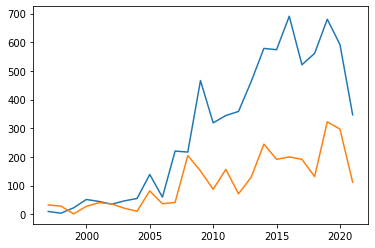

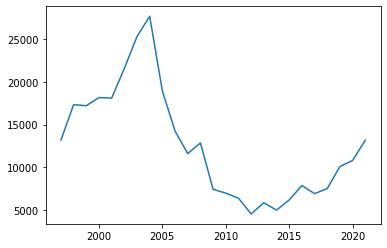

In [47]:
plt.plot(domestic_df['Year'], domestic_df['Total Citation Count'])
plt.plot(international_df['Year'], international_df['Total Citation Count'])
plt.show()
plt.plot(domestic_df['Year'], domestic_df['Deforestation'])

Making shifted variables

In [14]:
def get_shift(df, steps_back, min_year):
    
    df_shifted = pd.DataFrame({'Year': np.arange(min_year+steps_back, 2022)})
    
    deforestation_list = np.asarray(df['Deforestation'])
    deforestation_list = deforestation_list[steps_back:len(deforestation_list)]
    df_shifted['Deforestation'] = deforestation_list

    volume_list = np.asarray(df['Paper Volume'])
    volume_list = volume_list[0:len(volume_list)-steps_back]
    df_shifted[f'Paper Volume {steps_back} Year Prev'] = volume_list
    
    if df.columns.contains('GDP'):
        gdp_list = np.asarray(df['GDP'])
        gdp_list = gdp_list[0:len(gdp_list)-steps_back]
        df_shifted[f'GDP {steps_back} Year Prev'] = gdp_list
        
    
    return df_shifted

In [15]:
shift = 1

domestic_df_shift = get_shift(domestic_df, shift, min_year) 
international_df_shift = get_shift(international_df, shift, min_year)

'''
plt.scatter(domestic_df_shift[f'Paper Volume {shift} Year Prev'], domestic_df_shift['Deforestation'])
plt.xlabel('Paper Volume')
plt.ylabel('Deforestation rate')
plt.title(f'Deforestation rate vs. Paper Volume from {shift} Year Prev for Domestic Research')
plt.show()

plt.scatter(domestic_df_shift[f'GDP {shift} Year Prev'], domestic_df_shift['Deforestation'])
plt.xlabel('GDP in USD')
plt.ylabel('Deforestation rate')
plt.title(f'Deforestation rate vs. GDP from {shift} Year Prev')
plt.show()


plt.scatter(international_df_shift[f'Paper Volume {shift} Year Prev'], international_df_shift['Deforestation'])
plt.xlabel('Paper Volume')
plt.ylabel('Deforestation rate')
plt.title(f'Deforestation rate vs. Paper Volume from {shift} Year Prev for International Research')
plt.show()

'''

C:\Users\freja\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  del sys.path[0]


"\nplt.scatter(domestic_df_shift[f'Paper Volume {shift} Year Prev'], domestic_df_shift['Deforestation'])\nplt.xlabel('Paper Volume')\nplt.ylabel('Deforestation rate')\nplt.title(f'Deforestation rate vs. Paper Volume from {shift} Year Prev for Domestic Research')\nplt.show()\n\nplt.scatter(domestic_df_shift[f'GDP {shift} Year Prev'], domestic_df_shift['Deforestation'])\nplt.xlabel('GDP in USD')\nplt.ylabel('Deforestation rate')\nplt.title(f'Deforestation rate vs. GDP from {shift} Year Prev')\nplt.show()\n\n\nplt.scatter(international_df_shift[f'Paper Volume {shift} Year Prev'], international_df_shift['Deforestation'])\nplt.xlabel('Paper Volume')\nplt.ylabel('Deforestation rate')\nplt.title(f'Deforestation rate vs. Paper Volume from {shift} Year Prev for International Research')\nplt.show()\n\n"

# Model fitting

In [16]:
import statsmodels.api as sm
from scipy.interpolate import interp1d
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import patsy as pt

In [17]:
# normalizing volume -> don't want min. volume value to be zero
x = np.asarray(domestic_df['Paper Volume'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
domestic_df['Normalized_Volume'] = x_scaled[0:len(x_scaled)-1]

x = np.asarray(international_df['Paper Volume'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
international_df['Normalized_Volume'] = x_scaled[0:len(x_scaled)-1]

In [18]:
# normalizing total citation count
x = np.asarray(domestic_df['Total Citation Count'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
domestic_df['Normalized_Citations'] = x_scaled[0:len(x_scaled)-1]

x = np.asarray(international_df['Total Citation Count'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
international_df['Normalized_Citations'] = x_scaled[0:len(x_scaled)-1]

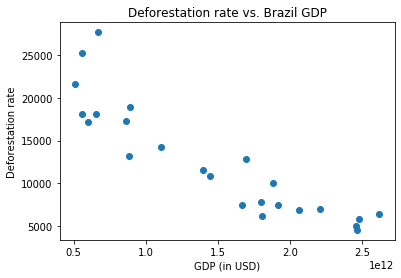

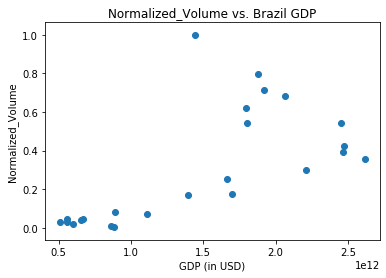

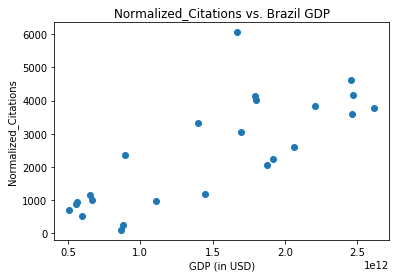

In [20]:


plt.scatter(domestic_df['GDP'], domestic_df['Deforestation'])
plt.xlabel('GDP (in USD)')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Brazil GDP')
plt.show()

plt.scatter(domestic_df['GDP'], domestic_df['Normalized_Volume'])
plt.xlabel('GDP (in USD)')
plt.ylabel('Normalized_Volume')
plt.title('Normalized_Volume vs. Brazil GDP')
plt.show()


plt.scatter(domestic_df['GDP'], domestic_df['Total Citation Count'])
plt.xlabel('GDP (in USD)')
plt.ylabel('Normalized_Citations')
plt.title('Normalized_Citations vs. Brazil GDP')
plt.show()

In [33]:
domestic_df.columns

Index(['Year', 'Deforestation', 'Paper Volume', 'Total Citation Count', 'GDP',
       'Avg Citation Count', 'Normalized_Volume', 'Normalized_Citations'],
      dtype='object')

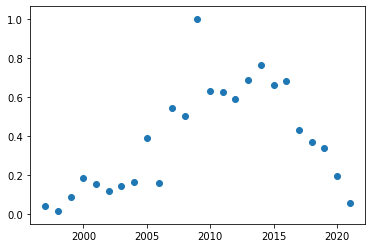

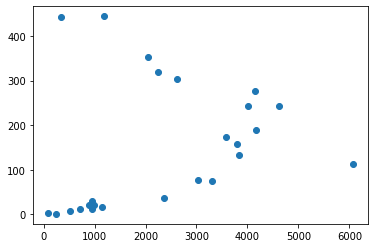

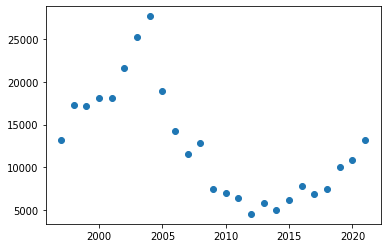

In [34]:
plt.scatter(domestic_df['Year'], domestic_df['Normalized_Citations'])
plt.show()
plt.scatter(domestic_df['Total Citation Count'], domestic_df['Paper Volume'])
plt.show()
plt.scatter(domestic_df['Year'], domestic_df['Deforestation'])
plt.show()

## Multiple linear regression

In [70]:
# normalizing total citation count
x = np.asarray(domestic_df['GDP'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
domestic_df['GDP_Normalized'] = x_scaled[0:len(x_scaled)-1]

domestic_df

,Year,Deforestation,Paper Volume,Total Citation Count,GDP,Avg Citation Count,Normalized_Volume,Normalized_Citations,GDP_Normalized
0,1997.0,13172.144784,1,9.840000,8.832060e+11,9.840000,0.002252,0.040561,0.337596
1,1998.0,17332.266829,4,3.833333,8.637110e+11,0.958333,0.009009,0.015169,0.330145
2,1999.0,17213.356961,8,22.652174,5.996420e+11,2.831522,0.018018,0.085903,0.229207
3,2000.0,18165.310252,17,51.727273,6.554480e+11,3.042781,0.038288,0.187634,0.250538
4,2001.0,18105.867806,12,44.904762,5.599840e+11,3.742063,0.027027,0.155482,0.214048
5,2002.0,21583.250899,13,35.250000,5.097950e+11,2.711538,0.029279,0.116241,0.194864
6,2003.0,25328.125000,20,46.789474,5.582340e+11,2.339474,0.045045,0.146579,0.213379
7,2004.0,27705.822842,20,55.222222,6.692890e+11,2.761111,0.045045,0.163891,0.255829
8,2005.0,18938.062050,36,139.000000,8.916340e+11,3.861111,0.081081,0.389613,0.340818
9,2006.0,14242.108813,31,59.812500,1.107630e+12,1.929435,0.069820,0.157791,0.423380


    Normalized_Citations  Normalized_Volume
0               0.040561           0.002252
1               0.015169           0.009009
2               0.085903           0.018018
3               0.187634           0.038288
4               0.155482           0.027027
5               0.116241           0.029279
6               0.146579           0.045045
7               0.163891           0.045045
8               0.389613           0.081081
9               0.157791           0.069820
10              0.545589           0.168919
11              0.501072           0.175676
12              1.000000           0.254505
13              0.631162           0.301802
14              0.624732           0.355856
15              0.591591           0.391892
16              0.687387           0.423423
17              0.763232           0.545045
18              0.662655           0.545045
19              0.683430           0.621622
20              0.430008           0.684685
21              0.370157        

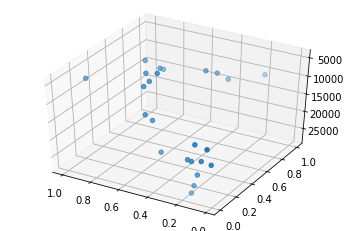

In [85]:
import statsmodels.api as sm


# Fit the simple linear regression
X = domestic_df[['Normalized_Citations', 'Normalized_Volume']][:-1]
print(X)
y = domestic_df['Deforestation'][:-1]


# Create linear regression object
sk_model = sm.OLS(y, sm.add_constant(X))
results = sk_model.fit()

print(results.summary())

from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X['Normalized_Citations'], X['Normalized_Volume'], y)
#ax.plot3D(X['Normalized_Citations'], X['Normalized_Volume'], sk_model)
ax.view_init(-140, 60)

## Polynomial regression

In [49]:
def calc_MSE_polynomial_fit(poly_order, X_train, X_val, y_train, y_val):
    if poly_order == 1:
        X_train_poly = X_train
        X_val_poly = X_val
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.fit_transform(X_val)
    
    # Fit the polynomial regression
    regr_poly = linear_model.LinearRegression()
    regr_poly.fit(X_train_poly, y_train)
    
    # Make predictions using the linear regression
    y_pred_poly_val = regr_poly.predict(X_val_poly)
    y_pred_poly_train = regr_poly.predict(X_train_poly)
    
    # Calculate the MSE for both the val and training sets
    MSE_val = mean_squared_error(y_val, y_pred_poly_val)
    MSE_train = mean_squared_error(y_train, y_pred_poly_train)
    
    return MSE_train, MSE_val

In [50]:
def poly_order_cv(X,y,k,poly_order_max):
    mses = pd.DataFrame()
    fold = 0

    kf = KFold(n_splits=k, shuffle=True, random_state=0) 
    for train_index, val_index in kf.split(X):
        # Separate each array into respective variables
        X_fold_train = X[train_index]
        y_fold_train = y[train_index]
        X_fold_val = X[val_index]
        y_fold_val = y[val_index]
    
        # Adding a column in the X matrices for the intercept
        X_fold_train = np.array(X_fold_train).reshape(-1, 1) 
        X_fold_val = np.array(X_fold_val).reshape(-1, 1) 

        # Calculate the MSE for each polynomial order
        MSE_val_array = []
        MSE_train_array = []
        
        for poly_order in range(1,poly_order_max+1):
            [MSE_train, MSE_val] = calc_MSE_polynomial_fit(poly_order, X_fold_train, X_fold_val, y_fold_train, y_fold_val)
            MSE_val_array.append(MSE_val)
            MSE_train_array.append(MSE_train) 
        mses[fold] = MSE_val_array
        fold = fold+1

    # Average the MSE across folds
    mses['mses_ave'] = mses.mean(axis=1)

    # Determine the minimum average MSE and the polynomial order where it occurs
    MSE_ave_val_min = min(mses.mses_ave)
    poly_order_MSE_ave_val_min = mses['mses_ave'].idxmin()+1
    
    return MSE_ave_val_min, poly_order_MSE_ave_val_min

In [51]:
def bootstrap_polynomial_sample_analysis(X,y, poly_order, x_array):
    
    x_bootstrap_min = min(X)
    x_bootstrap_max = max(X)
    
    X_reshape = np.array(X).reshape(-1, 1)

    # Generate features up to the specified polynomial order 
    if poly_order == 1:
        X_poly = X_reshape
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        X_poly = poly.fit_transform(X_reshape)
    
    # Fit the polynomial regression
    regr_poly = linear_model.LinearRegression()    
    regr_poly.fit(X_poly, y)
    
    # You do no want to extrapolate the bootstrapped regression beyond the range of the bootstrap data
    # For values below the lowest income in the bootstrap sample and above the highest income in the 
    # bootstrap sample, place NaN values. 
    entries_below_bootstrap_min = sum(x_array<x_bootstrap_min)
    y_pred_below_bootstrap_min = np.full(entries_below_bootstrap_min, np.nan)

    entries_above_bootstrap_max = sum(x_array>x_bootstrap_max)
    y_pred_above_bootstrap_max = np.full(entries_above_bootstrap_max, np.nan)

    # For entries within the bootstrap sample range, used your fitted regression to predict solar installation
    incomes_within_bootstrap_data =x_array[entries_below_bootstrap_min:(len(x_array) - entries_above_bootstrap_max)]
    #print(incomes_within_bootstrap_data)
    if poly_order == 1:
        incomes_within_bootstrap_data = incomes_within_bootstrap_data.reshape(-1, 1)
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        incomes_within_bootstrap_data = poly.fit_transform(incomes_within_bootstrap_data.reshape(-1, 1))
    y_pred_within_bootstrap_data_range = regr_poly.predict(incomes_within_bootstrap_data)

    # Concatenate the predicted solar installations for all three regions (below the lowest income in the bootstrap
    # sample, within the income data in the bootstrap sample, and above the highest income in the bootstrap sample)
    y_pred = np.concatenate((y_pred_below_bootstrap_min, y_pred_within_bootstrap_data_range, y_pred_above_bootstrap_max))

    return y_pred

In [52]:
def bootstrap_polynomial_analysis(df, variable_of_interest, response, poly_order_max, k):
    X = df[variable_of_interest]
    X = X.reset_index(drop = True)
    y = df[response]
    y = y.reset_index(drop = True)
    
    x_array = np.linspace(min(X), max(X), 100)
        
    # first determine the best polynomial order using cross-validation
    MSE_ave_val_min, poly_order_MSE_ave_val_min = poly_order_cv(X,y,k,poly_order_max)
    print('The average MSE of the valuation sets:', MSE_ave_val_min)
    print('This occured when using a polynomial of order:', poly_order_MSE_ave_val_min)
    
    # bootstrap analysis given this selected polynomial order
    y_pred_bootstrap = pd.DataFrame()
    for i in range(0,1000):
        df_bootstrap = df.sample(n=len(df), replace=True)
        X_bootstrap  = df_bootstrap[variable_of_interest]
        X_bootstrap  = X_bootstrap.reset_index(drop = True)
        y_bootstrap  = df_bootstrap[response]
        y_bootstrap  = y_bootstrap.reset_index(drop = True)

        y_pred = bootstrap_polynomial_sample_analysis(X_bootstrap, y_bootstrap, poly_order_MSE_ave_val_min, x_array)
        y_pred_bootstrap[i] = y_pred
        
    y_pred_bootstrap_summary = pd.DataFrame()
    y_pred_bootstrap_summary['median'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 50) for i in range(0, len(x_array))]  # median is 50th percentile
    y_pred_bootstrap_summary['95_CI_high'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 97.5) for i in range(0, len(x_array))]
    y_pred_bootstrap_summary['95_CI_low'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 2.5) for i in range(0, len(x_array))]

    
    return y_pred_bootstrap_summary, x_array

In [53]:
def plot_polynomial_bootstrap_analysis(domestic_df, international_df, variable_of_interest):
    
    response = 'Deforestation'
    poly_order_max = 5
    k = 5
    
    print('Domestic Research:')
    [y_bootstrap_summary_domestic, x_array_domestic] = bootstrap_polynomial_analysis(domestic_df, variable_of_interest, response, poly_order_max, k)
    print('International Research:')
    [y_bootstrap_summary_international, x_array_international] = bootstrap_polynomial_analysis(international_df, variable_of_interest, response, poly_order_max, k)

    plt.scatter(domestic_df[variable_of_interest], domestic_df[response], s=5, color='b')
    plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], 'b')
    plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = 'b', alpha = 0.5, label='domestic')
    
    plt.scatter(international_df[variable_of_interest], international_df[response], s=5, color='m')
    plt.plot(x_array_international, y_bootstrap_summary_international['median'], 'm')
    plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = 'm', alpha = 0.5, label='international')
   
    plt.xlabel(variable_of_interest)
    plt.ylabel('Deforestation Rate (acres(?) per Year)')
    plt.title(f'Deforestation Rate vs. {variable_of_interest}')
    plt.legend()
    plt.show()

### Polynomial Bootstrap analysis for each variable

In [54]:
domestic_df.columns

Index(['Year', 'Deforestation', 'Paper Volume', 'Total Citation Count', 'GDP',
       'Avg Citation Count', 'Normalized_Volume', 'Normalized_Citations'],
      dtype='object')

Domestic Research:
The average MSE of the valuation sets: 16606535.893384332
This occured when using a polynomial of order: 2
International Research:
The average MSE of the valuation sets: 19785039.67079497
This occured when using a polynomial of order: 2


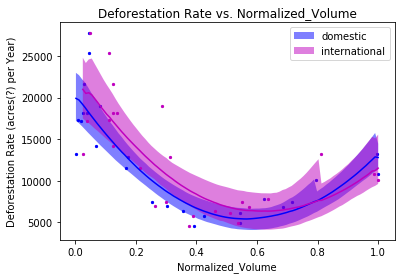

Domestic Research:
The average MSE of the valuation sets: 11828839.402563265
This occured when using a polynomial of order: 5
International Research:
The average MSE of the valuation sets: 36861289.14844645
This occured when using a polynomial of order: 1


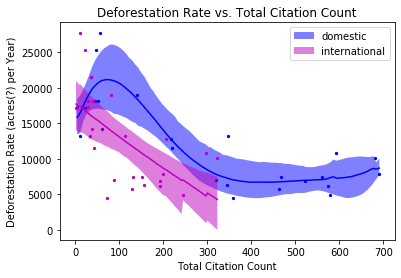

Domestic Research:
The average MSE of the valuation sets: 23208000.318029962
This occured when using a polynomial of order: 3
International Research:
The average MSE of the valuation sets: 33253324.694431257
This occured when using a polynomial of order: 2


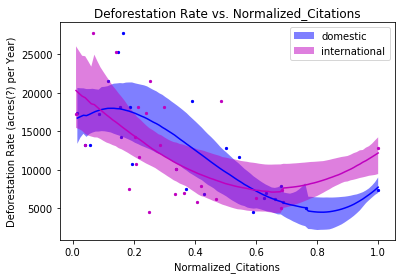

Domestic Research:
The average MSE of the valuation sets: 56392922.67971401
This occured when using a polynomial of order: 1
International Research:
The average MSE of the valuation sets: 60005824.57203474
This occured when using a polynomial of order: 2


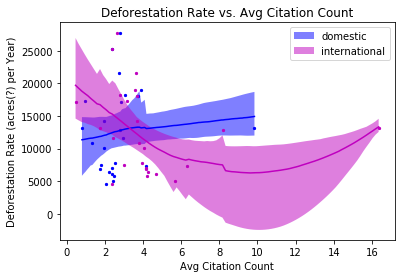

In [55]:
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Normalized_Volume')
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Total Citation Count')
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Normalized_Citations')
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Avg Citation Count')

### Natural splines

In [56]:
def confidence_interval(X, y, y_pred):
    # Covariance of coefficient estimates
    mse = np.sum(np.square(y_pred - y)) / y.size
    cov = mse * np.linalg.inv(X.T @ X)
    # Alternatively the covariance could be found using StatsModels:
    # cov = model.cov_params()

    # Calculate variance of f(x)
    var_f = np.diagonal((X @ cov) @ X.T)

    # Derive standard error of f(x) from variance
    se       = np.sqrt(abs(var_f))
    conf_int = 2*se

    return conf_int


def nat_spline_degree_of_freedom_cv_with_CI(df, variable_of_interest, response, k, degree, degree_of_freedom_max):
    
    # DataFrame to store the MSE values for each fold and d.o.f
    mses = pd.DataFrame()
    
    # creating folds for cross-validation
    fold = 0
    kf = KFold(n_splits=k, shuffle=True, random_state=0) 
    
    for train_index, val_index in kf.split(df):
        
        # Separate into training and validation sets
        df_train = np.asarray(df)[train_index]
        df_train = pd.DataFrame(df_train, columns=df.columns)
        df_val = np.asarray(df)[val_index]
        df_val = pd.DataFrame(df_val, columns=df.columns)

        # Calculate the MSE for each degree of freedom
        MSE_array = []
        # minimum: spline degree+1, maximum: max. degree of freedom specified
        for deg_free in range(degree + 1, degree_of_freedom_max + 1):
            
            # Use patsy to generate entire matrix of basis functions for train and validation sets
            string = f'cr({variable_of_interest}, df=' + str(deg_free)+')'
            X_train_pt = pt.dmatrix(string, df_train)
            X_val_pt = pt.dmatrix(string, df_val)
            
            # extracting y-values from dataframes for train and validation sets
            y_train = df_train[response]
            y_val = df_val[response]
            
            # Fit linear regression model on training data
            model = sm.OLS(y_train, X_train_pt).fit(disp=0)
            
            # get predicted values from validation set
            y_pred = model.predict(X_val_pt)
        
            # computing MSE value and putting into arrays
            MSE_val = mean_squared_error(y_val, y_pred)
            MSE_array.append(MSE_val)
            
            
        mses[fold] = MSE_array
        fold = fold+1

    # Average the MSE across folds
    mses['mses_ave'] = mses.mean(axis=1)

    # Determine the minimum average MSE and the degree of freedom where it occurs
    MSE_ave_min = min(mses.mses_ave)
    degree_of_freedom_MSE_ave_min = mses['mses_ave'].idxmin()+degree+1
    
    
    # Calculate the 95% confidence interval
    string = f'bs({variable_of_interest}, df=' + str(degree_of_freedom_MSE_ave_min) + ', degree=' + str(degree) + ', include_intercept=True)'
    X = pt.dmatrix(string, df)
    y = np.asarray(df[response])

    # Fit the regression model
    model = sm.OLS(y, X).fit(disp=0)
    y_pred = model.predict(X)
    conf_int = confidence_interval(X, y, y_pred)
    
    
    
    return MSE_ave_min, degree_of_freedom_MSE_ave_min, conf_int, y_pred

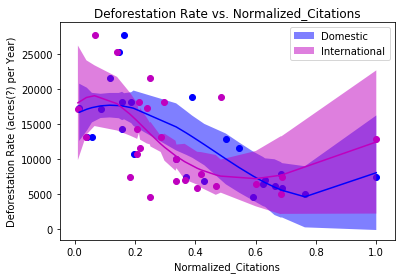

In [65]:
variable_of_interest = 'Normalized_Citations'
response = 'Deforestation'
k = 5
degree = 3
degree_of_freedom_max = 10

MSE_ave_min_domestic, degree_of_freedom_MSE_ave_min_domestic, conf_int_domestic, y_pred_domestic = nat_spline_degree_of_freedom_cv_with_CI(domestic_df, variable_of_interest, response, k, degree, degree_of_freedom_max)
MSE_ave_min_international, degree_of_freedom_MSE_ave_min_interational, conf_int_international, y_pred_international = nat_spline_degree_of_freedom_cv_with_CI(international_df, variable_of_interest, response, k, degree, degree_of_freedom_max)

domestic_splines_df = pd.DataFrame({'x': domestic_df[variable_of_interest], 'y': y_pred_domestic, 'conf_int': conf_int_domestic})
domestic_splines_df = domestic_splines_df.sort_values(by=['x'], axis=0)
domestic_splines_df = domestic_splines_df.reset_index(drop=True)

international_splines_df = pd.DataFrame({'x': international_df[variable_of_interest], 'y': y_pred_international, 'conf_int': conf_int_international})
international_splines_df = international_splines_df.sort_values(by=['x'], axis=0)
international_splines_df = international_splines_df.reset_index(drop=True)

plt.scatter(domestic_df[variable_of_interest], domestic_df[response], color='b')
plt.plot(domestic_splines_df['x'], domestic_splines_df['y'], 'b')
plt.fill_between(domestic_splines_df['x'], domestic_splines_df['y']-domestic_splines_df['conf_int'], domestic_splines_df['y']+domestic_splines_df['conf_int'], facecolor='b', alpha=0.5, label='Domestic')

plt.scatter(international_df[variable_of_interest], international_df[response], color='m')
plt.plot(international_splines_df['x'], international_splines_df['y'], 'm')
plt.fill_between(international_splines_df['x'], international_splines_df['y']-international_splines_df['conf_int'], international_splines_df['y']+international_splines_df['conf_int'], facecolor='m', alpha=0.5, label='International')

plt.xlabel(variable_of_interest)
plt.ylabel('Deforestation Rate (acres(?) per Year)')
plt.title(f'Deforestation Rate vs. {variable_of_interest}')
plt.legend()
plt.show()

In [59]:
def plot_polynomial_bootstrap_analysis(domestic_df, international_df, variable_of_interest):
    
    response = 'Deforestation'
    degree_of_freedom_max = 10
    degree = 3
    k = 5
    
    print('Domestic Research:')
    [y_bootstrap_summary_domestic, x_array_domestic] = nat_spline_degree_of_freedom_cv_with_CI(domestic_df, variable_of_interest, response, k, degree, degree_of_freedom_max)
    print('International Research:')
    [y_bootstrap_summary_international, x_array_international] = nat_spline_degree_of_freedom_cv_with_CI(international_df, variable_of_interest, response, k, degree, degree_of_freedom_max)

    plt.scatter(domestic_df[variable_of_interest], domestic_df[response], s=5, color='b')
    plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], 'b')
    plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = 'b', alpha = 0.5, label='domestic')
    
    plt.scatter(international_df[variable_of_interest], international_df[response], s=5, color='m')
    plt.plot(x_array_international, y_bootstrap_summary_international['median'], 'm')
    plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = 'm', alpha = 0.5, label='international')
   
    plt.xlabel(variable_of_interest)
    plt.ylabel('Deforestation Rate (acres(?) per Year)')
    plt.title(f'Deforestation Rate vs. {variable_of_interest}')
    plt.legend()
    plt.show()

In [49]:
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Normalized_Citations')

Domestic Research:


ValueError: too many values to unpack (expected 2)

### LOWESS

In [51]:
def lowess_cv(X, y, k, number_fractions_considered):
    mses = pd.DataFrame()
    fold = 0

    kf = KFold(n_splits=k, shuffle=True, random_state=0) 
    for train_index, val_index in kf.split(X):
        # Separate each array into respective variables
        X_fold_train = X[train_index]
        y_fold_train = y[train_index]
        X_fold_val = X[val_index]
        y_fold_val = y[val_index]

        MSE_array = []
        interval = 1/number_fractions_considered
        fractions_considered = np.arange(interval,1+interval,interval)
        for fraction in fractions_considered:
            # Fit LOWESS model
            lowess = sm.nonparametric.lowess(y_fold_train, X_fold_train, frac=fraction)
            lowess_x = list(zip(*lowess))[0]
            lowess_y = list(zip(*lowess))[1]
            f = interp1d(lowess_x, lowess_y, bounds_error=False) 
            y_pred = f(X_fold_val)
            
            # Calculate the mean squared error
            #   If the validation set has data points outside the income range of the training set, 
            #   an error would occur in the calculation of the MSE. Therefore, validation points outside
            #   the training range are removed for this calculation
            if np.isnan(y_pred).any()==True:
                y_comparison = pd.DataFrame({'y_pred': np.array(y_pred), 'y_fold_val': np.array(y_fold_val)}, columns=['y_pred', 'y_fold_val'])
                y_comparison = y_comparison.dropna()
                MSE = mean_squared_error(y_comparison.y_fold_val, y_comparison.y_pred) 
                #if len(y_comparison) > 0 else 100
            else:
                MSE = mean_squared_error(y_fold_val, y_pred)
            MSE_array.append(MSE)

        mses[fold] = MSE_array
        fold = fold+1

    # Average the MSE across folds
    mses['mses_ave'] = mses.mean(axis=1)

    # Determine the minimum average MSE and with which fraction (span) does it occur
    MSE_ave_min = min(mses.mses_ave)
    span_MSE_ave_min_index = mses['mses_ave'].idxmin()
    span_MSE_ave_min = fractions_considered[span_MSE_ave_min_index]
    
    return MSE_ave_min, span_MSE_ave_min

In [52]:
def bootstrap_lowess_sample_analysis(X,y, fraction, x_array):
    x_bootstrap_min = min(X)
    x_bootstrap_max = max(X)
    
    # Fit LOWESS model
    lowess = sm.nonparametric.lowess(y, X, frac=fraction)
    lowess_x = list(zip(*lowess))[0]
    lowess_y = list(zip(*lowess))[1]
    f = interp1d(lowess_x, lowess_y, bounds_error=False)
    
    # You do no want to extrapolate the bootstrapped regression beyond the range of the bootstrap data
    # For values below the lowest income in the bootstrap sample and above the highest income in the 
    # bootstrap sample, place NaN values. 
    entries_below_bootstrap_min = sum(x_array<x_bootstrap_min)
    y_pred_below_bootstrap_min = np.full(entries_below_bootstrap_min, np.nan)

    entries_above_bootstrap_max = sum(x_array>x_bootstrap_max)
    y_pred_above_bootstrap_max = np.full(entries_above_bootstrap_max, np.nan)

    # For entries within the bootstrap sample range, used your fitted regression to predict solar installation
    incomes_within_bootstrap_data =x_array[entries_below_bootstrap_min:(len(x_array) - entries_above_bootstrap_max)]
    y_pred_within_bootstrap_data_range = f(incomes_within_bootstrap_data)

    # Concatenate the predicted solar installations for all three regions (below the lowest income in the bootstrap
    # sample, within the income data in the bootstrap sample, and above the highest income in the bootstrap sample)
    y_pred = np.concatenate((y_pred_below_bootstrap_min, y_pred_within_bootstrap_data_range, y_pred_above_bootstrap_max))

    return y_pred

In [53]:
def bootstrap_lowess_analysis(df,variable_of_interest,response,k,number_fractions_considered):
    
    X = df[variable_of_interest]
    X = X.reset_index(drop = True)
    y = df[response]
    y = y.reset_index(drop = True)
    
    x_array = np.linspace(min(X), max(X), 100)
    
    # determining optimal span using cross-validation
    MSE_ave_val_min, span_MSE_ave_min = lowess_cv(X, y, k, number_fractions_considered)
    print('The average MSE across the folds when using optimal span:', MSE_ave_val_min)
    print('The optimal span:', span_MSE_ave_min)
    
    # now performing bootstrap analysis for 100 samples given this optimal span value
    y_pred_bootstrap = pd.DataFrame()
    for i in range(0,100):        
        # getting bootstrap samples
        df_bootstrap = df.sample(n=len(df), replace=True)
        X_bootstrap  = df_bootstrap[variable_of_interest]
        X_bootstrap  = X_bootstrap.reset_index(drop = True)
        y_bootstrap  = df_bootstrap[response]
        y_bootstrap  = y_bootstrap.reset_index(drop = True)
        
        # getting predicted y-values for bootstrap sample and putting them in the dataframe
        y_pred = bootstrap_lowess_sample_analysis(X_bootstrap, y_bootstrap, span_MSE_ave_min, x_array)
        y_pred_bootstrap[i] = y_pred
    
    # computing statistics on the bootstrap analysis (median, confidence intervals)
    y_pred_bootstrap_summary = pd.DataFrame()
    y_pred_bootstrap_summary['median'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 50) for i in range(0, len(x_array))]  # median is 50th percentile
    y_pred_bootstrap_summary['95_CI_high'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 97.5) for i in range(0, len(x_array))]
    y_pred_bootstrap_summary['95_CI_low'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 2.5) for i in range(0, len(x_array))]
        
    
    return y_pred_bootstrap_summary, x_array

In [54]:
def plot_lowess_bootstrap_analysis(domestic_df, international_df, variable_of_interest):
    
    response = 'Deforestation'
    number_fractions_considered = 10
    k = 5
    
    print('Domestic Research:')
    [y_bootstrap_summary_domestic, x_array_domestic] = bootstrap_lowess_analysis(domestic_df, variable_of_interest, response, k, number_fractions_considered)
    print('International Research:')
    [y_bootstrap_summary_international, x_array_international] = bootstrap_lowess_analysis(international_df, variable_of_interest, response, k, number_fractions_considered)

    plt.scatter(domestic_df[variable_of_interest], domestic_df[response], s=5, color='b')
    plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], 'b')
    plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = 'b', alpha = 0.5, label='international')
  
    plt.scatter(international_df[variable_of_interest], international_df[response], s=5, color='m')
    plt.plot(x_array_international, y_bootstrap_summary_international['median'], 'm')
    plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = 'm', alpha = 0.5, label='domestic')

    plt.xlabel(variable_of_interest)
    plt.ylabel('Deforestation Rate (km^2(?) per Year)')
    plt.title(f'Deforestation Rate vs. {variable_of_interest}')
    plt.legend()
    plt.show()

Domestic Research:
The average MSE across the folds when using optimal span: 23112518.828999005
The optimal span: 0.30000000000000004


C:\Users\freja\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


International Research:
The average MSE across the folds when using optimal span: 36794416.85714433
The optimal span: 1.0


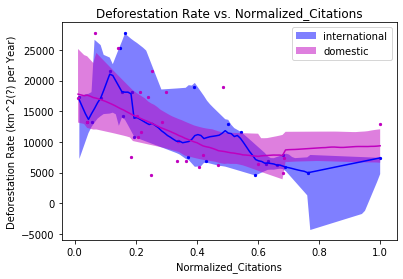

In [55]:
plot_lowess_bootstrap_analysis(domestic_df, international_df, 'Normalized_Citations')

In [36]:
plot_lowess_bootstrap_analysis(domestic_df, international_df, 'Paper Volume')

Domestic Research:


C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\freja\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.